In [1]:
import numpy as np
import torch
import torchvision.transforms as transforms
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
class AddGaussianNoise:
    """Add Gaussian noise to a tensor with a given mean and standard deviation"""
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

In [14]:
class ToGreyScale:
    """Convert a tensor to grayscale."""
    def __init__(self) -> None:
        pass
    def __call__(self, tensor):
        return transforms.Grayscale(num_output_channels=1)(tensor)

In [4]:
def plot_histogram(img,title, bins = 100):
    img,grid = torch.histogram(img,bins=bins)
    img = img.numpy()
    grid = grid.numpy()
    
    plt.bar(grid[1:],img)
    plt.title(title)

List of transforms to be applied

In [5]:
transform = transforms.Compose([
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                AddGaussianNoise(mean=0.0, std=0.1)])

Testing 

(3, 540, 960)


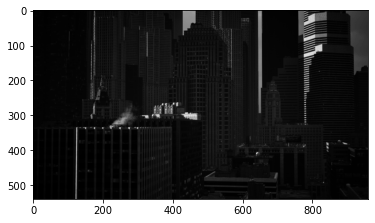

In [27]:
test_image = cv.imread('Sequence037.0422.exr', cv.IMREAD_REDUCED_COLOR_2 + cv.IMREAD_ANYDEPTH)
test_image = np.transpose(test_image, (2, 0, 1))
test_image = torch.from_numpy(test_image)
test_image = ToGreyScale()(test_image)
plt.imshow(np.transpose(test_image.numpy(), (1, 2, 0)), cmap='gray')

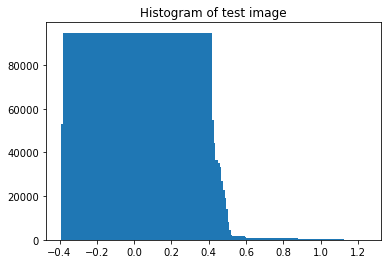

In [29]:
plot_histogram(test_image, 'Histogram of test image', bins=100)